**1. Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.animation import FuncAnimation

**2. Cleaning the Data**

In [2]:
df = pd.read_csv('./data/un-country-data.csv')
countries = df[df['ISO3_code'].notnull()]

columns = ['ISO3_code', 
           'Location',
           'Time',
           'TPopulation1Jan',
           'TPopulation1July']

clean_df = countries[columns]

C:\Users\adans\AppData\Local\Temp\ipykernel_24904\2878772641.py:1: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/un-country-data.csv')


In [3]:
clean_df.head(3)

,ISO3_code,Location,Time,TPopulation1Jan,TPopulation1July
44384,BDI,Burundi,1950,2229.322,2254.938
44385,BDI,Burundi,1951,2280.554,2305.746
44386,BDI,Burundi,1952,2330.938,2355.804


In [4]:
clean_df.to_csv('./data/clean-data.csv', index=False)

In [5]:
#load cleaned data
pop_data = pd.read_csv('./data/clean-data.csv')
pop_data

,ISO3_code,Location,Time,TPopulation1Jan,TPopulation1July
0,BDI,Burundi,1950,2229.322,2254.938
1,BDI,Burundi,1951,2280.554,2305.746
2,BDI,Burundi,1952,2330.938,2355.804
3,BDI,Burundi,1953,2380.670,2405.186
4,BDI,Burundi,1954,2429.703,2454.586
...,...,...,...,...,...
36019,WLF,Wallis and Futuna Islands,2097,7.161,7.122
36020,WLF,Wallis and Futuna Islands,2098,7.084,7.043
36021,WLF,Wallis and Futuna Islands,2099,7.002,6.958
36022,WLF,Wallis and Futuna Islands,2100,6.915,6.878


In [ ]:
pop_data.rename(columns={'Location': 'label',
                         'Time': 'dt',
                            'TPopulation1July': 'x'}, inplace=True)
pop_data.drop(columns=['TPopulation1Jan', 'ISO3_code'], inplace=True)

In [15]:
pop_data

,label,dt,x
0,Burundi,1950,2254.938
1,Burundi,1951,2305.746
2,Burundi,1952,2355.804
3,Burundi,1953,2405.186
4,Burundi,1954,2454.586
...,...,...,...
36019,Wallis and Futuna Islands,2097,7.122
36020,Wallis and Futuna Islands,2098,7.043
36021,Wallis and Futuna Islands,2099,6.958
36022,Wallis and Futuna Islands,2100,6.878


In [16]:
pop_data.to_csv('./data/clean-formatted-data.csv', index=False)

**3. EDA**

In [6]:
top10_1950 = pop_data[pop_data['Time'] == 1950].nlargest(10, 'TPopulation1Jan').sort_values('TPopulation1Jan', ascending=True)

<BarContainer object of 10 artists>

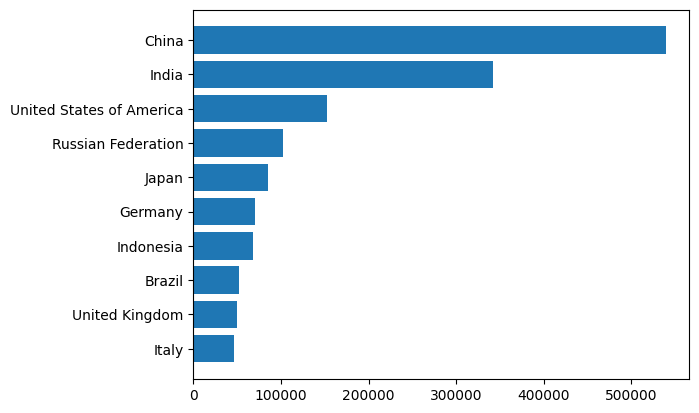

In [7]:
plt.barh(top10_1950['Location'], 
         top10_1950['TPopulation1Jan'])

<Axes: xlabel='TPopulation1Jan', ylabel='Location'>

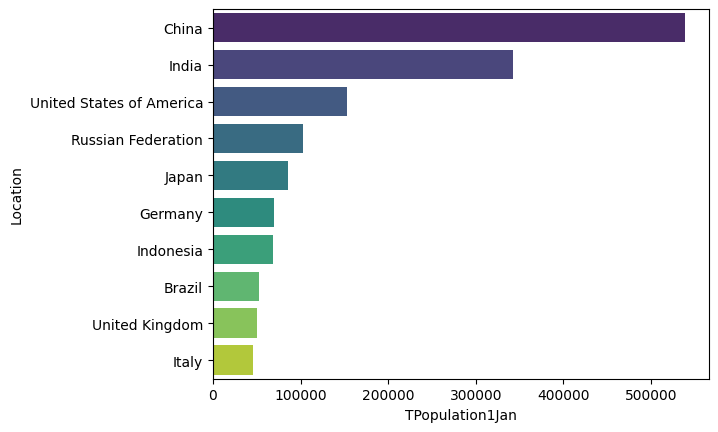

In [8]:
sns.barplot(x='TPopulation1Jan', 
            y='Location', 
            data=top10_1950.sort_values(by='TPopulation1Jan', ascending=False), 
            hue = 'Location', 
            legend=False, 
            palette='viridis')

In [9]:
years = np.arange(1950,2101).tolist()
top_countries_per_year = []
for year in years:
    top_10_year = pop_data[pop_data['Time'] == year].nlargest(10, 'TPopulation1Jan')['Location'].tolist()
    for i in top_10_year:
        if i not in top_countries_per_year:
            top_countries_per_year.append(i)

In [10]:
top_countries_per_year

['China',
 'India',
 'United States of America',
 'Russian Federation',
 'Japan',
 'Germany',
 'Indonesia',
 'Brazil',
 'United Kingdom',
 'Italy',
 'Bangladesh',
 'Pakistan',
 'Nigeria',
 'Mexico',
 'Ethiopia',
 'Democratic Republic of the Congo',
 'United Republic of Tanzania']